In [1]:
# XGBOOST


from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

RSEED=42

In [2]:
data = pd.read_csv('data/cleaned_data.csv')

data.head()

,state,slug,launched_at_weekday,launched_at_month,duration_days,goal_in_usd,north_america
0,1,10,2,12,45,200.0,1
1,1,0,2,2,20,400.0,1
2,1,11,1,11,30,27224.0,1
3,1,5,5,10,41,45461.0,0
4,0,13,0,3,30,1000.0,1


In [3]:
# define target and features variables

X = data.drop('state', axis=1)
y = data.state

In [4]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [5]:
xgb_model = XGBClassifier() 

In [14]:
# fit model on training data

eval_set = [(X_test, y_test)]

xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

# xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.65961
[1]	validation_0-logloss:0.64147
[2]	validation_0-logloss:0.63080
[3]	validation_0-logloss:0.62388
[4]	validation_0-logloss:0.61838
[5]	validation_0-logloss:0.61057
[6]	validation_0-logloss:0.60669
[7]	validation_0-logloss:0.60272
[8]	validation_0-logloss:0.60077
[9]	validation_0-logloss:0.59673
[10]	validation_0-logloss:0.59568
[11]	validation_0-logloss:0.59424
[12]	validation_0-logloss:0.59340
[13]	validation_0-logloss:0.59250
[14]	validation_0-logloss:0.59212
[15]	validation_0-logloss:0.59157
[16]	validation_0-logloss:0.59097
[17]	validation_0-logloss:0.59040
[18]	validation_0-logloss:0.59016
[19]	validation_0-logloss:0.58974
[20]	validation_0-logloss:0.58937
[21]	validation_0-logloss:0.58931
[22]	validation_0-logloss:0.58908
[23]	validation_0-logloss:0.58843
[24]	validation_0-logloss:0.58832
[25]	validation_0-logloss:0.58800
[26]	validation_0-logloss:0.58757
[27]	validation_0-logloss:0.58734
[28]	validation_0-logloss:0.58725
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
# make prediction for the test data

y_pred = xgb_model.predict(X_test)


In [16]:
# model evaluation

accuracy = accuracy_score(y_test, y_pred)

print('Acurracy: %.2f%%' % (accuracy * 100))

print(classification_report(y_test, y_pred))

Acurracy: 69.12%
              precision    recall  f1-score   support

           0       0.67      0.50      0.57     25135
           1       0.70      0.83      0.76     35236

    accuracy                           0.69     60371
   macro avg       0.69      0.66      0.67     60371
weighted avg       0.69      0.69      0.68     60371



In [17]:
from xgboost import plot_importance
from matplotlib import pyplot

xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

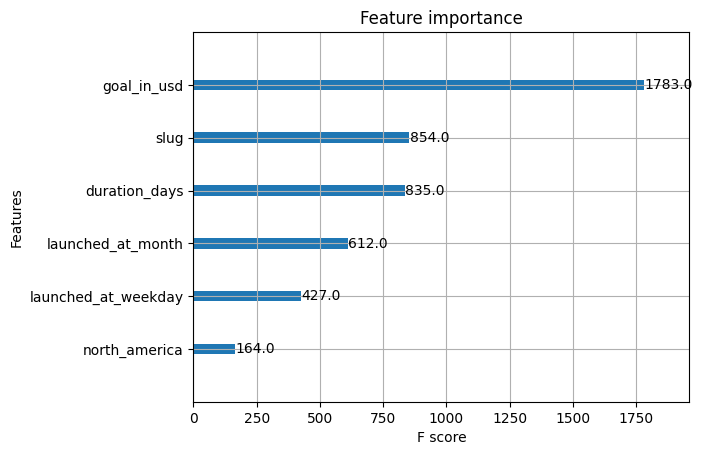

In [18]:
# plot feature importance

plot_importance(xgb_model)

pyplot.show()

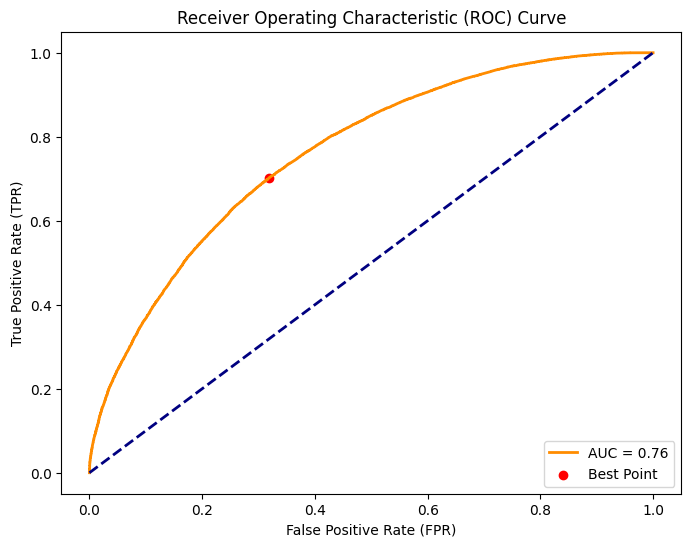

In [32]:
# Calculating ROC curve and AUC

from sklearn.metrics import roc_curve, auc

# Getting predicted probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# fpr_best, tpr_best, threshold_best = roc_curve(y_test,y_pred)
best_index = np.argmax(tpr - fpr)



# Plotting the ROC curve
plt.figure(figsize=(8, 6))
# plt.plot(fpr_best[1], tpr_best[1], 'ro')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[best_index], tpr[best_index], color='red', marker='o', label='Best Point')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Finding the index corresponding to the best point on the curve
best_index = np.argmax(tpr - fpr)

# Plotting the ROC curve with the best point highlighted
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[best_index], tpr[best_index], color='red', marker='o', label='Best Point')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Index of misclassified instances
misclassified_indices = np.where(y_test != y_pred)[0]

# Extracting misclassified instances
misclassified_instances = X_test.iloc[misclassified_indices]

# Displaying misclassified instances
print("Misclassified Instances:")
print(misclassified_instances)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57     25135
           1       0.70      0.83      0.76     35236

    accuracy                           0.69     60371
   macro avg       0.69      0.66      0.67     60371
weighted avg       0.69      0.69      0.68     60371

Misclassified Instances:
        slug  launched_at_weekday  launched_at_month  duration_days   
121821     6                    2                  5             21  \
54657     12                    0                  4             45   
179604     0                    1                  2             23   
11596     10                    0                  7             60   
5609       6                    0                  4             30   
...      ...                  ...                ...            ...   
197746     6                    0                  3             30   
190391     5                    2                  3     

In [ ]:
# Function to plot ROC curve 

def plot_roc_curve(fpr, tpr, fpr_best_point, tpr_best_point, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr_best_point, tpr_best_point,'ro')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


y_pred_best_tree = gs_tree.best_estimator_.predict(X_test)
y_pred_proba_tree = gs_tree.predict_proba(X_test)[:,1]

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
fpr_tree_best, tpr_tree_best, threshold_tree_best = roc_curve(y_test, y_pred_best_tree)

print('ROC score: ', roc_auc_score(y_test, y_pred_proba_tree))

plot_roc_curve(fpr_tree, tpr_tree, fpr_tree_best[1], tpr_tree_best[1])

In [26]:
def plot_roc_curve(fpr, tpr, fpr_best_point, tpr_best_point, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr_best_point, tpr_best_point,'ro')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
# fpr_tree_best, tpr_tree_best, threshold_tree_best = roc_curve(y_test, y_pred_best_tree)

In [ ]:
# plot_roc_curve(fpr_tree, tpr_tree, fpr_tree_best[1], tpr_tree_best[1])